In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Word vectorization and splitting dataset
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Building sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding
from keras.utils import to_categorical

# Convolutional Layers
from keras.layers import Conv1D, GlobalMaxPool1D, SpatialDropout1D, MaxPooling1D

# Cofigurations
from keras.callbacks import ModelCheckpoint

# Avoiding warnings
import warnings
import os

In [ ]:
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')
file = 'drive/MyDrive/digikala_dataset.txt'

df = pd.read_csv(file, sep="\t", header=None, error_bad_lines=False)
df.columns = ["score", "comment"]

Mounted at /content/drive


b'Skipping line 82: expected 2 fields, saw 4\nSkipping line 2429: expected 2 fields, saw 4\nSkipping line 3944: expected 2 fields, saw 4\nSkipping line 5847: expected 2 fields, saw 5\nSkipping line 6639: expected 2 fields, saw 3\nSkipping line 9319: expected 2 fields, saw 3\nSkipping line 12082: expected 2 fields, saw 17\nSkipping line 13159: expected 2 fields, saw 3\nSkipping line 14444: expected 2 fields, saw 6\nSkipping line 15109: expected 2 fields, saw 5\nSkipping line 16391: expected 2 fields, saw 29\nSkipping line 19098: expected 2 fields, saw 7\nSkipping line 19714: expected 2 fields, saw 3\nSkipping line 23227: expected 2 fields, saw 4\nSkipping line 24211: expected 2 fields, saw 5\nSkipping line 26373: expected 2 fields, saw 3\nSkipping line 29248: expected 2 fields, saw 5\nSkipping line 31275: expected 2 fields, saw 8\nSkipping line 31376: expected 2 fields, saw 3\nSkipping line 35116: expected 2 fields, saw 3\nSkipping line 36097: expected 2 fields, saw 3\nSkipping line 404

In [ ]:
df.head()

,score,comment
0,0,لطفا رنگ سفید رو هم موجود کنید
1,0,با سلام؛ من همین الان میخواستم نوک مدادی بخرم ...
2,0,من یه روز گذاشتم شارژ 12 روز شارژ داشت
3,0,برای خاموش کردن نوار چراغ پایین گوشی از برنامه...
4,0,سلام بر دیجی کالا من میخواستم امروز بخرم ولی ا...


In [ ]:
df = df[df.score != 0]
df.head()

,score,comment
5,1,سلام من سه هفتس این گوشی رو خریدم واقعا عالیه ...
6,1,دیجی جون خدایی موجودش کن خیلی وقته منتظریم.. خ...
12,1,همه چیزش معرکه ست تو این رنج قیمت مخصوصا (فورجیش)
17,1,خیلی عالیه بنظر من اگه این رو بخری خیلی سود کر...
20,1,بابا تو رو خدا شگفت انگیزش کنین قبل عید این گو...


In [ ]:
df[df.score == 1]

,score,comment
5,1,سلام من سه هفتس این گوشی رو خریدم واقعا عالیه ...
6,1,دیجی جون خدایی موجودش کن خیلی وقته منتظریم.. خ...
12,1,همه چیزش معرکه ست تو این رنج قیمت مخصوصا (فورجیش)
17,1,خیلی عالیه بنظر من اگه این رو بخری خیلی سود کر...
20,1,بابا تو رو خدا شگفت انگیزش کنین قبل عید این گو...
...,...,...
200633,1,لطفا بگید به اندروید بالا تر اپدیت می شه یانه ...
200651,1,در ضمن دوستان می توانند برای اطلاعات بیشتر و ق...
200655,1,فعلا تا وقتی z4 نیامده بهترین اندرویدیه فقط یه...
200659,1,به احترام شاهکارمایکروسافت سکوت...


In [ ]:
df[df.score == -1]

,score,comment
59,-1,من این گوشی رو 2 سال داشتم واقعا توی این دو سا...
61,-1,از دی جی کالا تشکر میکنم و متوجه دلیل تایید نش...
66,-1,با سلام خدمت دوستان. یه مورد جالب در مورد این ...
68,-1,نسبت به گوشی های هم رده خودش قیمت بالایی داره
128,-1,موبایله خوبیه . طول عمر باطریشم بالاست صفحه نم...
...,...,...
200453,-1,پيشنهاد ميکنم براي اين رنج قيمت xperia SL بخريد
200517,-1,ال جی این بار خراب کرده امیدوارم تو ورژن های ب...
200561,-1,به نظر من ارزش خريد نداره.فک نميکنم 0.1اينج بز...
200605,-1,فقط توي بعضي از بازي هاي HD که توي يک صحنه چند...


In [ ]:
# df.loc[df['score'] == -1, 'score'] = 0

In [ ]:
print(len(df[df.score == -1]))

4194


In [ ]:
print(len(df[df.score == 1]))

45823


In [ ]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Sentiment Analysis

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.comment, df.score, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(40013,)
(10004,)


In [ ]:
epochs = 4
batch_size = 128

n_dim = 100
n_unique_words = 2000
max_text_length = 2000

In [ ]:
token = Tokenizer(num_words=n_unique_words, lower=False)
token.fit_on_texts(x_train)


train_sequences = token.texts_to_sequences(x_train)
train_sequences_matrix = pad_sequences(train_sequences, maxlen=max_text_length)


test_sequences = token.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_text_length)

In [ ]:
print(len(train_sequences_matrix[0]))

2000


#model 1

In [ ]:
#model

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=n_unique_words))
model.add(Conv1D(256, 5 , activation='relu'))
model.add(SpatialDropout1D(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 2000, 100)         200000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 1996, 256)         128256    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1996, 256)         0         
_________________________________________________________________
dense_8 (Dense)              (None, 1996, 128)         32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1996, 128)         0         
_________________________________________________________________
dense_9 (Dense)              (None, 1996, 1)           129       
Total params: 361,281
Trainable params: 361,281
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/4
313/313 [==============================] - 50s 156ms/step - loss: 2.4383 - accuracy: 0.9201 - val_loss: 2.7560 - val_accuracy: 0.9096
Epoch 2/4
313/313 [==============================] - 48s 155ms/step - loss: 2.5404 - accuracy: 0.9167 - val_loss: 2.7560 - val_accuracy: 0.9096
Epoch 3/4
313/313 [==============================] - 49s 155ms/step - loss: 2.4456 - accuracy: 0.9198 - val_loss: 2.7560 - val_accuracy: 0.9096
Epoch 4/4
313/313 [==============================] - 49s 155ms/step - loss: 2.6272 - accuracy: 0.9139 - val_loss: 2.7560 - val_accuracy: 0.9096


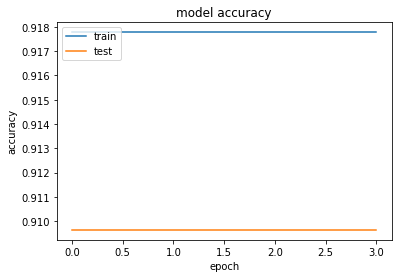

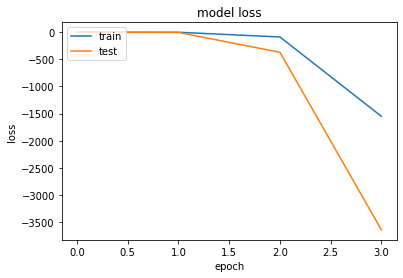

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 5s 15ms/step - loss: -3645.8188 - accuracy: 0.9096


[-3645.81884765625, 0.9096361398696899]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


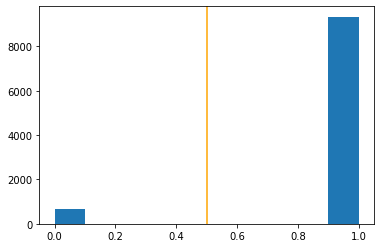

In [ ]:
y_predict = model.predict_proba(test_sequences_matrix)

plt.hist(y_predict)
_ = plt.axvline(x=.5, color='orange')

#model 2

In [ ]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=n_unique_words))
model.add(Conv1D(filters=32, kernel_size=5, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_sequences_matrix, y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          verbose=1, 
          validation_data=(test_sequences_matrix, y_test))

Epoch 1/5
626/626 [==============================] - 23s 36ms/step - loss: 0.5757 - accuracy: 0.8757 - val_loss: 0.2954 - val_accuracy: 0.8674
Epoch 2/5
626/626 [==============================] - 22s 35ms/step - loss: 0.1862 - accuracy: 0.8347 - val_loss: 0.1753 - val_accuracy: 0.8259
Epoch 3/5
626/626 [==============================] - 22s 35ms/step - loss: 0.0413 - accuracy: 0.8551 - val_loss: 0.1151 - val_accuracy: 0.8301
Epoch 4/5
626/626 [==============================] - 22s 35ms/step - loss: 0.0671 - accuracy: 0.8587 - val_loss: 0.1269 - val_accuracy: 0.8632
Epoch 5/5
626/626 [==============================] - 22s 35ms/step - loss: -0.0374 - accuracy: 0.8619 - val_loss: 0.1441 - val_accuracy: 0.8220


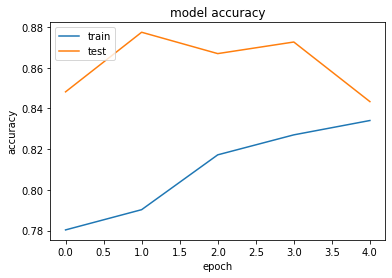

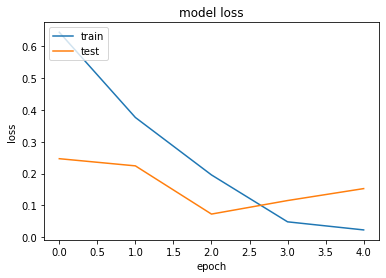

In [ ]:
plot(history)

In [ ]:
model.evaluate(test_sequences_matrix, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.1441 - accuracy: 0.8220


[0.1441354751586914, 0.8219712376594543]